## Данные
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

## Список задач
1. `5 баллов` Загрузите файл HR.csv в pandas dataframe
2. `10 баллов` Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).
3. `10 баллов` Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.
4. `5 баллов` Рассчитайте сколько сотрудников работает в каждом
департаменте.
5. `5 баллов` Показать распределение сотрудников по зарплатам.
6. `5 баллов` Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности.
7. `10 баллов` Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом.
8. `10 баллов` Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
  * Доля сотрудников с повышением за последние 5 лет
  * Средняя степень удовлетворенности
  * Среднее количество проектов
9. `20 баллов` Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки.
10. `5 баллов` Загрузить jupyter notebook с решением на github и прислать ссылку.

Итого - максимум 85 баллов

Для зачета необходимо набрать минимум 55

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro, mannwhitneyu

### Задача 1 `5 баллов` (Готово)
Загрузите файл HR.csv в pandas dataframe

In [41]:
df = pd.read_csv('./HR.csv')
correct_names = {'number_project':'number_projects',
                 'average_montly_hours':'average_monthly_hours',
                 'Work_accident':'work_accident'}

df = df.rename(columns=correct_names)
df.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_projects        14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Задача 2. `10 баллов` (Готово)
Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [43]:
df.describe()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Альтернативный способ

In [44]:
def base_stats(data, columns):

    mean = data.mean()
    min = data.min()
    median = data.median()
    max = data.max()
    mode = data.mode()[0]
    std = data.std()

    _df = pd.DataFrame({'mean':   [mean],
                        'min':    [min],
                        'median': [median],
                        'max':    [max],
                        'mode':   [mode],
                        'std':    [std]
                        }, index=[column])

    return _df

In [45]:
categorical_columns = ['work_accident',
                       'left',
                       'promotion_last_5years']

contin_columns = ['satisfaction_level',
                  'last_evaluation',
                  'number_projects',
                  'average_monthly_hours',
                  'time_spend_company']

In [46]:
_dfs = []
for column in contin_columns:
    _df = base_stats(df[column], column)
    _dfs.append(_df)

_result = pd.concat(_dfs)
base_stat = _result.transpose()
base_stat

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spend_company
mean,0.612834,0.716102,3.803054,201.050337,3.498233
min,0.090000,0.360000,2.000000,96.000000,2.000000
median,0.640000,0.720000,4.000000,200.000000,3.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000
mode,0.100000,0.550000,4.000000,135.000000,3.000000
std,0.248631,0.171169,1.232592,49.943099,1.460136


In [47]:
_dfs = []
for column in categorical_columns:
    _df = base_stats(df[column], column)
    _dfs.append(_df)

_result = pd.concat(_dfs)
base_stat = _result.transpose()
base_stat

,work_accident,left,promotion_last_5years
mean,0.144610,0.238083,0.021268
min,0.000000,0.000000,0.000000
median,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000
mode,0.000000,0.000000,0.000000
std,0.351719,0.425924,0.144281


### Задача 3. `10 баллов` (Готово)
Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определить две самые скоррелированные и две наименее скоррелированные переменные.

Количественные признаки:
* satisfaction_level
* last_evaluation
* number_projects
* average_monthly_hours
* time_spend_company

In [48]:
# Подсчет корреляционной матрицы
corr_matrix_pearson = (df[['satisfaction_level','last_evaluation',
                           'number_projects','average_monthly_hours',
                           'time_spend_company']].corr())
corr_matrix_pearson

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_projects,-0.142970,0.349333,1.000000,0.417211,0.196786
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


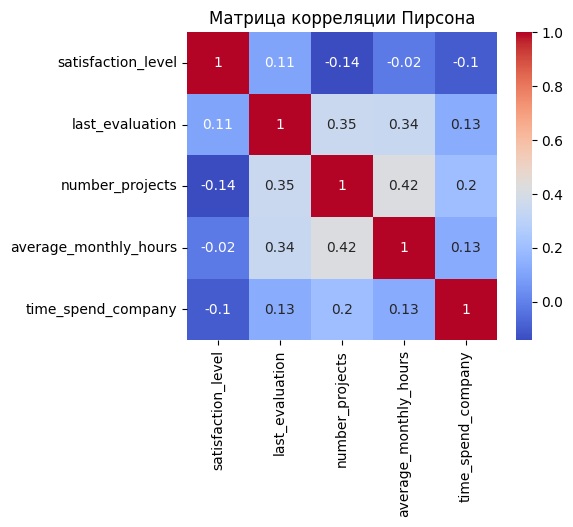

In [49]:
plt.figure(figsize=[5,4])
sns.heatmap(corr_matrix_pearson, annot=True, cmap='coolwarm')
plt.title("Матрица корреляции Пирсона")
plt.show()

In [50]:
# Определение двух наиболее скоррелированных и двух наименее скоррелированных переменных
corr_pairs = corr_matrix_pearson.unstack().sort_values(ascending=False)
most_correlated = corr_pairs[corr_pairs < 1].head(1)
least_correlated = corr_pairs[corr_pairs < 1].tail(1)

print("Наиболее скоррелированные переменные:")
print(most_correlated)

print("\nНаименее скоррелированные переменные:")
print(least_correlated)

Наиболее скоррелированные переменные:
number_projects  average_monthly_hours    0.417211
dtype: float64

Наименее скоррелированные переменные:
satisfaction_level  number_projects   -0.14297
dtype: float64


### Задача 4. `5 баллов` (Готово)
Рассчитайте сколько сотрудников работает в каждом департаменте.

In [51]:
df['left'].unique()

array([1, 0], dtype=int64)

In [52]:
# общее число сотрудников в каждом отделе
df.groupby('department').size()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

In [53]:
# Разделим сотрудников на трудоустроенных и уволенных
not_left = df.loc[df['left'] == 0]
left = df.loc[df['left'] == 1]

In [54]:
# посчитаем число действующих сотрудников в каждом отделе
depart_not_left = not_left.groupby('department').size()
depart_not_left

department
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
dtype: int64

In [55]:
# посчитаем число уволенных сотрудников в каждом отделе
depart_left = left.groupby('department').size()
depart_left

department
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697
dtype: int64

### Задача 5. `5 баллов` (Готово)
Покажите распределение сотрудников по зарплатам.

In [56]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

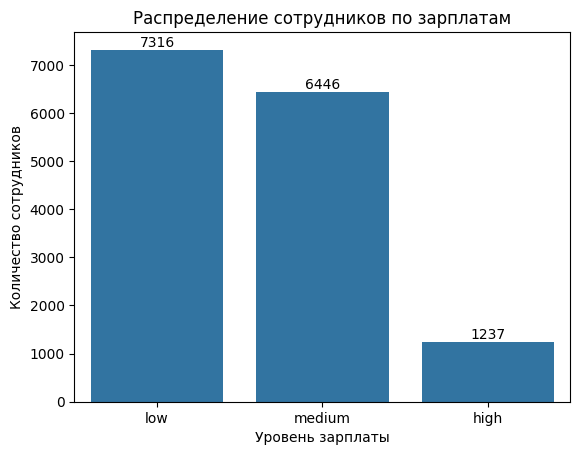

In [57]:
# Подсчет общего количества сотрудников по уровню зарплаты
salary_distribution = df['salary'].value_counts()

# Отображение графика распределения по зарплатам
ax = sns.barplot(x = salary_distribution.index, y = salary_distribution.values)

plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам')

# Добавление числовых значений над каждой колонкой
for i, v in enumerate(salary_distribution.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

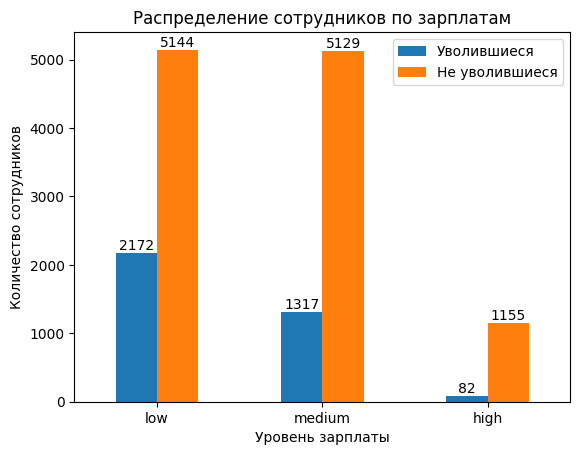

In [58]:
# Подсчет количества уволенных и не уволенных сотрудников по уровню зарплаты
salary_left_counts = left['salary'].value_counts()
salary_not_left_counts = not_left['salary'].value_counts()

# Создание датафрейма для данных о распределении
df_distribution = pd.DataFrame({'Уволившиеся': salary_left_counts,
                                'Не уволившиеся': salary_not_left_counts})

# Отображение графика распределения по зарплатам
ax = df_distribution.plot(kind='bar')

ax.set_xlabel('Уровень зарплаты')
ax.set_ylabel('Количество сотрудников')
ax.set_title('Распределение сотрудников по зарплатам')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Добавление числовых значений над каждой колонкой
for i in ax.patches:
    ax.annotate(str(i.get_height()),
                   (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

plt.show()

### Задача 6. `5 баллов` (Готово)
Покажите распределение сотрудников по зарплатам в каждом департаменте по отдельности.

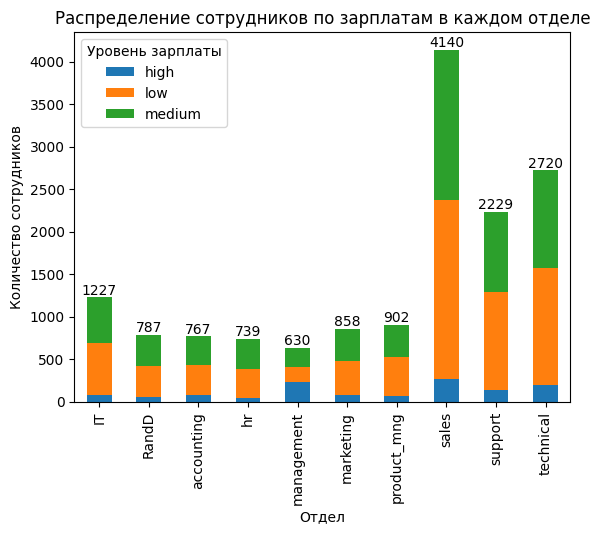

In [59]:
df_grouped = df.groupby(['department', 'salary']).size().unstack()

df_department_total = df_grouped.sum(axis=1)

# Построение графика stacked bar для каждого отдела
ax = df_grouped.plot(kind='bar', stacked=True)

# Добавление подписей суммарного числа сотрудников в отделах
for i, v in enumerate(df_department_total):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Отдел')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам в каждом отделе')
plt.legend(title='Уровень зарплаты')

plt.show()

### Задача 7. `10 баллов` (Готово)
Проверьте гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

H0 - сотрудники с высоким окладом проводят на работе СТОЛЬКО ЖЕ времени, что и сотрудники с низким окладом.

H1 - сотрудники с высоким окладом проводят на работе БОЛЬШЕ времени, чем сотрудники с низким окладом.

In [60]:
# Сформируем датасет из необходимых показателей

high_salary = df[df['salary'].isin(['high'])].reset_index(drop=True)
low_salary = df[df['salary'].isin(['low'])].reset_index(drop=True)

high_salary.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.45,0.49,2,149,3,0,1,0,product_mng,high
1,0.09,0.85,6,289,4,0,1,0,hr,high
2,0.44,0.51,2,156,3,0,1,0,technical,high
3,0.45,0.53,2,129,3,0,1,0,technical,high
4,0.37,0.46,2,149,3,0,1,0,marketing,high


#### Визуальное сравнение распределения

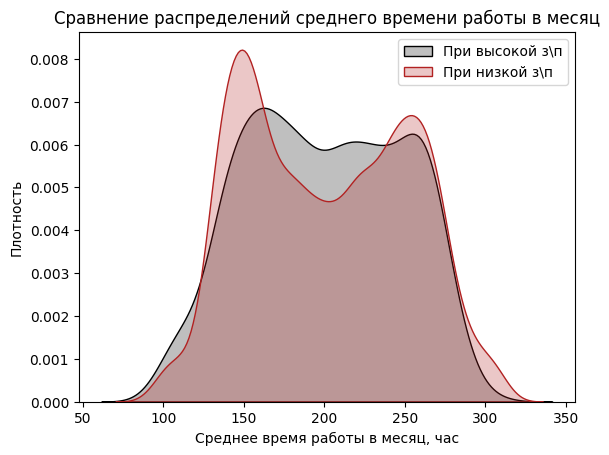

In [61]:
sns.kdeplot(high_salary['average_monthly_hours'],
            label='При высокой з\п', fill=True, color='#000000')
sns.kdeplot(low_salary['average_monthly_hours'],
            label='При низкой з\п', fill=True, color='#B22222')
plt.legend()
plt.title('Сравнение распределений среднего времени работы в месяц')
plt.xlabel('Среднее время работы в месяц, час')
plt.ylabel('Плотность')
plt.show()

#### Тест Шапиро-Уилка

In [62]:
def check_normality(data):
    '''Проверяет нормальнотсь распределения'''

    stat, p_value = stats.shapiro(data)

    print(f'stat = {stat:.3f}, p = {p_value:.5f}')
    if p_value > 0.05:
      print('Вероятно нормальное распределение')
    else:
      print('Вероятно не нормальное распределение')

In [63]:
check_normality(high_salary['average_monthly_hours'])

stat = 0.971, p = 0.00000
Вероятно не нормальное распределение


In [64]:
check_normality(low_salary['average_monthly_hours'])

stat = 0.960, p = 0.00000
Вероятно не нормальное распределение


C:\Users\AKirishchev\AppData\Local\Temp\ipykernel_18228\281176193.py:4: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7316.
  stat, p_value = stats.shapiro(data)


Распределение не нормальное. поэтому будем использовать критерий Манна-Уитни

#### Критерий Манна-Уитни

In [65]:
stat, p_value = mannwhitneyu(high_salary['average_monthly_hours'],
                             low_salary['average_monthly_hours'])

print(f'Статистика = {stat:.5f}, p = {p_value:.5f}')

if p_value > 0.05:
  print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
  print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 4507096.50000, p = 0.82413
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


#### Вывод
Сотрудники с высоким окладом, вероятно. проводят на работе НЕ больше времени, чем сотрудники с низким окладом.

### Задача 8. `10 баллов` (Готово)
Рассчитайте следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
  * Доля сотрудников с повышением за последние 5 лет
  * Средняя степень удовлетворенности
  * Среднее количество проектов

#### Доля сотрудников с повышением за последние 5 лет

In [66]:
prom_left_counts = left['promotion_last_5years'].value_counts()
prom_not_left_counts = not_left['promotion_last_5years'].value_counts()

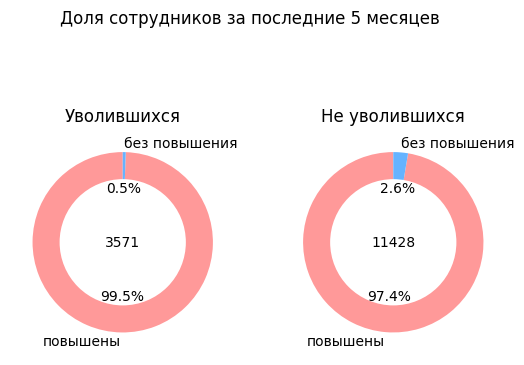

In [67]:
# укажем цветовую схему
colors = ['#ff9999','#66b3ff']

# создадим круг в центре
centre_circle1 = plt.Circle((0,0), 0.70, fc='white')
centre_circle2 = plt.Circle((0,0), 0.70, fc='white')

# Создание графика Donut Plot
fig, axs = plt.subplots(1, 2)

# уволившиеся
axs[0].pie(prom_left_counts, labels={'повышены':1, 'без повышения':0},
           colors=colors, autopct='%1.1f%%', startangle=90)
total_employees_1 = sum(prom_left_counts)
axs[0].text(0, 0, f'{total_employees_1}', ha='center', va='center')
axs[0].add_artist(centre_circle1)
axs[0].set_title('Уволившихся')

# не уволившиеся
axs[1].pie(prom_not_left_counts, labels={'повышены':1, 'без повышения':0},
           colors=colors, autopct='%1.1f%%', startangle=90)
total_employees_2 = sum(prom_not_left_counts)
axs[1].text(0, 0, f'{total_employees_2}', ha='center', va='center')
axs[1].add_artist(centre_circle2)
axs[1].set_title('Не уволившихся')

# Удаление осей
for ax in axs:
    ax.axis('off')

plt.suptitle('Доля сотрудников за последние 5 месяцев')
plt.show()

#### Средняя степень удовлетворённости

In [68]:
sat_left_counts = left['satisfaction_level']
sat_not_left_counts = not_left['satisfaction_level']

In [69]:
sat_left_counts.describe()

count    3571.000000
mean        0.440098
std         0.263933
min         0.090000
25%         0.130000
50%         0.410000
75%         0.730000
max         0.920000
Name: satisfaction_level, dtype: float64

In [70]:
sat_not_left_counts.describe()

count    11428.000000
mean         0.666810
std          0.217104
min          0.120000
25%          0.540000
50%          0.690000
75%          0.840000
max          1.000000
Name: satisfaction_level, dtype: float64

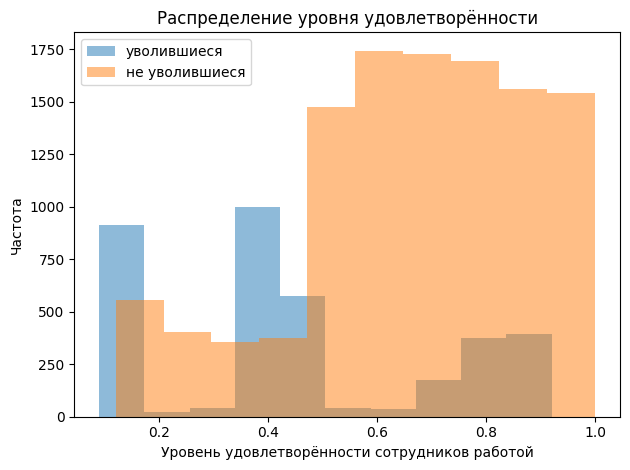

In [71]:
plt.hist(sat_left_counts, alpha=0.5, label='уволившиеся')
plt.hist(sat_not_left_counts, alpha=0.5, label='не уволившиеся')
plt.title('Распределение уровня удовлетворённости')
plt.legend(loc='upper left')
plt.xlabel('Уровень удовлетворённости сотрудников работой')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

In [72]:
print('Средний уровень удовлетворённости работой:')
print(f'\nсреди уволившихся сотрудников {sat_left_counts.mean():.0%}')
print(f'\nсреди не уволившихся сотрудников {sat_not_left_counts.mean():.0%}')

Средний уровень удовлетворённости работой:

среди уволившихся сотрудников 44%

среди не уволившихся сотрудников 67%


#### Средне количество проектов

In [73]:
proj_left_counts = left['number_projects']
proj_not_left_counts = not_left['number_projects']
proj_left_counts.describe()

count    3571.000000
mean        3.855503
std         1.818165
min         2.000000
25%         2.000000
50%         4.000000
75%         6.000000
max         7.000000
Name: number_projects, dtype: float64

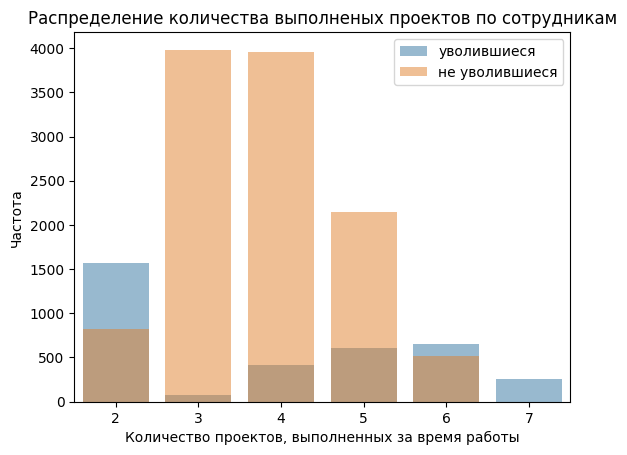

In [74]:
sns.countplot(data=left, x='number_projects', alpha=0.5, label='уволившиеся')
sns.countplot(data=not_left, x='number_projects', alpha=0.5, label='не уволившиеся')
plt.xlabel('Количество проектов, выполненных за время работы')
plt.ylabel('Частота')
plt.legend(loc='upper right')
plt.title('Распределение количества выполненых проектов по сотрудникам')
plt.show()

In [75]:
print('Среднее количество выполненных проектов:')
print(f'\nсреди уволившихся сотрудников {proj_left_counts.mean():.2}')
print(f'\nсреди не уволившихся сотрудников {proj_not_left_counts.mean():.2}')

Среднее количество выполненных проектов:

среди уволившихся сотрудников 3.9

среди не уволившихся сотрудников 3.8


In [76]:
print('Чаще всего выполняется проектов:')
print(f'\nсреди уволившихся сотрудников {proj_left_counts.mode()[0]}')
print(f'\nсреди не уволившихся сотрудников {proj_not_left_counts.mode()[0]}')

Чаще всего выполняется проектов:

среди уволившихся сотрудников 2

среди не уволившихся сотрудников 3


### Задача 9. `20 баллов`
Разделите данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки.

### Задача 10. `5 баллов`
Загрузите jupyter notebook с решением на github и прислать ссылку.

# Ожидаемая сумма баллов 60